# Exploración de datos
En este script se pueden explorar algunos de los archivos del conjunto de imágenes con sus respectivas etiquetas.
Para lograrlo se toma la carpeta con las imágenes y sus correspondinetes etiquetas PASCAL. Las etiquetas de formato .xml se tranforman en un archivo de formato csv. Este archivo es útilizado para la verificación de la correcta ubicación de las cajas de detección de los tomates. Adicionalmente se exploran algunos modelos de clasificación como InceptionV3 y ResNet para verificar su desempeño con algunos parches de este conjunto de datos.


###Librerias

In [48]:
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import cv2
import random
import matplotlib.image as mpimg
import shutil
from sklearn.datasets import *
#from local.lib import mlutils
from IPython.display import Image
from skimage import io
from google.colab import drive
from zipfile import ZipFile
%matplotlib inline
%load_ext tensorboard
tf.__version__

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'2.15.0'

### Ejemplo de una imagen

In [49]:
# Habilitar contenido del Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [50]:
%cd  /content/gdrive/MyDrive
!ls

/content/gdrive/MyDrive
 DCIM				    'My Drive'
'Documento sin título.gdoc'	    'paulina.arregocesg@udea.edu.co 2024-01-18 10:56'
 Maestría-20240528T194911Z-001.zip   Proyecto_FD
 Maestría-20240528T194911Z-002.zip  'Tesis-Paulina Arregoces - Repositorio 2024.docx'


In [ ]:
# Aqui falta la linea de codigo para clonar el repo en este ubicación

In [51]:
# Ruta del archivo ZIP que deseas descomprimir
%cd  /content/gdrive/MyDrive/Proyecto_FD

!unzip datos_tomate.zip

print("¡Archivo ZIP descomprimido con éxito!")

/content/gdrive/MyDrive/Proyecto_FD
Archive:  datos_tomate.zip
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0011_05.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0014_02.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0015_14.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0025_13.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0025_15.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0033_07.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0035_10.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0036_09.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0043_05.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0045_08.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0057_13.jpg  
  inflating: explo_img/anglerandom_tomate_barroselas_20200806_0058_13.jpg  
  inflating: explo_img/an

In [52]:
!ls /content/gdrive/MyDrive/Proyecto_FD

'00-seleccion de datos.ipynb'	    Annotations_test.txt   explo_img   test_xml
'01 - exploración de datos.ipynb'   Annotations.txt	   explo_xml   yolo-v4-tf.keras
'02 - preprocesado.ipynb'	    Clases.txt		   images      YoloWeight
'03- procesamiento.ipynb'	    datos_tomate.zip	   test_img


In [53]:
!ls /content/gdrive/MyDrive/Proyecto_FD/explo_img

anglerandom_tomate_barroselas_20200806_0011_05.jpg
anglerandom_tomate_barroselas_20200806_0014_02.jpg
anglerandom_tomate_barroselas_20200806_0015_14.jpg
anglerandom_tomate_barroselas_20200806_0025_13.jpg
anglerandom_tomate_barroselas_20200806_0025_15.jpg
anglerandom_tomate_barroselas_20200806_0033_07.jpg
anglerandom_tomate_barroselas_20200806_0035_10.jpg
anglerandom_tomate_barroselas_20200806_0036_09.jpg
anglerandom_tomate_barroselas_20200806_0043_05.jpg
anglerandom_tomate_barroselas_20200806_0045_08.jpg
anglerandom_tomate_barroselas_20200806_0057_13.jpg
anglerandom_tomate_barroselas_20200806_0058_13.jpg
anglerandom_tomate_barroselas_20200806_0061_08.jpg
anglerandom_tomate_barroselas_20200806_0069_03.jpg
anglerandom_tomate_barroselas_20200806_0069_13.jpg
anglerandom_tomate_barroselas_20200806_0072_02.jpg
anglerandom_tomate_barroselas_20200806_0072_16.jpg
anglerandom_tomate_barroselas_20200806_0075_16.jpg
anglerandom_tomate_barroselas_20200806_0085_13.jpg
anglerandom_tomate_barroselas_2

In [54]:
!ls /content/gdrive/MyDrive/Proyecto_FD/explo_xml

anglerandom_tomate_barroselas_20200806_0011_05.xml
anglerandom_tomate_barroselas_20200806_0014_02.xml
anglerandom_tomate_barroselas_20200806_0015_14.xml
anglerandom_tomate_barroselas_20200806_0025_13.xml
anglerandom_tomate_barroselas_20200806_0025_15.xml
anglerandom_tomate_barroselas_20200806_0033_07.xml
anglerandom_tomate_barroselas_20200806_0035_10.xml
anglerandom_tomate_barroselas_20200806_0036_09.xml
anglerandom_tomate_barroselas_20200806_0043_05.xml
anglerandom_tomate_barroselas_20200806_0045_08.xml
anglerandom_tomate_barroselas_20200806_0057_13.xml
anglerandom_tomate_barroselas_20200806_0058_13.xml
anglerandom_tomate_barroselas_20200806_0061_08.xml
anglerandom_tomate_barroselas_20200806_0069_03.xml
anglerandom_tomate_barroselas_20200806_0069_13.xml
anglerandom_tomate_barroselas_20200806_0072_02.xml
anglerandom_tomate_barroselas_20200806_0072_16.xml
anglerandom_tomate_barroselas_20200806_0075_16.xml
anglerandom_tomate_barroselas_20200806_0085_13.xml
anglerandom_tomate_barroselas_2

In [55]:
def ruta_random(carpetas_imagenes):
    # Obtener la lista de imágenes disponibles
    imagenes = os.listdir(carpetas_imagenes)

    # Elegir una imagen aleatoria
    imagen_aleatoria = random.choice(imagenes)
    ruta_imagen = os.path.join(carpetas_imagenes, imagen_aleatoria)

    return ruta_imagen


/content/gdrive/MyDrive/Proyecto_FD/explo_img/noiserandom_tomate_barroselas_20200806_0073_17.jpg


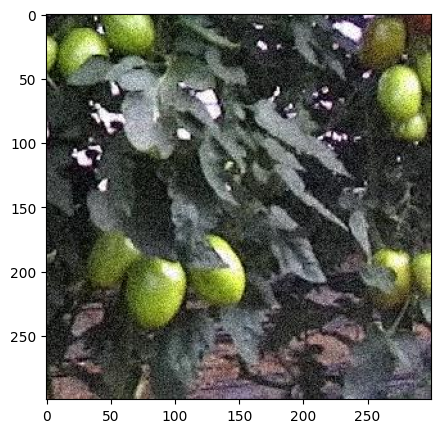

In [63]:
ruta_img= ruta_random('/content/gdrive/MyDrive/Proyecto_FD/explo_img')

print(ruta_img)

img = io.imread(ruta_img)
plt.figure(figsize=(5,5))
plt.imshow(img)

In [64]:
#Convertir datos xml a csv
def xml_to_csv(path):
    classes_names = []
    xml_list = []

    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        image_filename = os.path.splitext(os.path.basename(xml_file))[0] + '.jpg'  # Obtener el nombre de la imagen del nombre del archivo XML
        for member in root.findall('object'):
            classes_names.append(member[0].text)
            value = (image_filename,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(round(float(member[4][0].text))),
                     int(round(float(member[4][1].text))),
                     int(round(float(member[4][2].text))),
                     int(round(float(member[4][3].text))))
            xml_list.append(value)

    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    classes_names = list(set(classes_names))
    classes_names.sort()
    return xml_df, classes_names


In [65]:
for label_path in ['data_labels']:
  image_path = os.path.join('/content/gdrive/MyDrive/Proyecto_FD/explo_xml')
  xml_df, classes = xml_to_csv(image_path)
  xml_df.to_csv(f'{label_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

label_map_path = os.path.join("label_map.pbtxt")
pbtxt_content = ""

for i, class_name in enumerate(classes):
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(i + 1, class_name)
    )
pbtxt_content = pbtxt_content.strip()

with open(label_map_path, "w") as f:
    f.write(pbtxt_content)
    print('Successfully created label_map.pbtxt ')

Successfully converted data_labels xml to csv.
Successfully created label_map.pbtxt 


In [66]:
boxes = pd.read_csv("data_labels.csv")
boxes

,filename,width,height,class,xmin,ymin,xmax,ymax
0,anglerandom_tomate_barroselas_20200806_0011_05...,300,300,tomato,171,84,223,133
1,anglerandom_tomate_barroselas_20200806_0011_05...,300,300,tomato,191,106,245,160
2,anglerandom_tomate_barroselas_20200806_0011_05...,300,300,tomato,185,124,221,168
3,anglerandom_tomate_barroselas_20200806_0014_02...,300,300,tomato,159,12,214,68
4,anglerandom_tomate_barroselas_20200806_0015_14...,300,300,tomato,256,73,300,141
...,...,...,...,...,...,...,...,...
805,translaterandom_tomate_barroselas_20200806_027...,300,300,tomato,103,64,139,92
806,translaterandom_tomate_barroselas_20200806_028...,300,300,tomato,65,9,131,81
807,translaterandom_tomate_barroselas_20200806_028...,300,300,tomato,39,0,93,42
808,translaterandom_tomate_barroselas_20200806_029...,300,300,tomato,76,149,121,205


In [67]:
# Contar el número de valores únicos en la columna 'filename'
num_unique_filenames = boxes['filename'].nunique()

# Imprimir el resultado
print("Número de filenames diferentes:", num_unique_filenames)

Número de filenames diferentes: 296


In [68]:
# Verificación de csv bien desarrollado
def verificar_nombres_imagenes(carpetas_imagenes, archivo_csv, columna_nombre_imagen):
    # Obtener los nombres de las imágenes en la carpeta
    nombres_imagenes = set(os.listdir(carpetas_imagenes))

    # Leer el archivo CSV y extraer los nombres de imagen de la columna especificada
    nombres_en_csv = set()
    with open(archivo_csv, 'r') as f:
        csv_reader = csv.DictReader(f)
        for row in csv_reader:
            nombres_en_csv.add(row[columna_nombre_imagen])

    # Verificar si hay nombres de imágenes en el CSV que no están en la carpeta
    nombres_faltantes = nombres_en_csv - nombres_imagenes

    # Mostrar los nombres de las imágenes faltantes
    if nombres_faltantes:
        print("Las siguientes imágenes están presentes en el CSV pero no se encontraron en la carpeta:")
        for nombre in nombres_faltantes:
            print(nombre)
    else:
        print("Todos los nombres de las imágenes en el CSV están presentes en la carpeta.")

In [69]:
# Directorio de la carpeta de imágenes
carpetas_imagenes = '/content/gdrive/MyDrive/Proyecto_FD/explo_img'

# Ruta del archivo CSV y nombre de la columna que contiene los nombres de las imágenes
archivo_csv = 'data_labels.csv'
columna_nombre_imagen = 'filename'

# Verificar los nombres de las imágenes en el CSV
verificar_nombres_imagenes(carpetas_imagenes, archivo_csv, columna_nombre_imagen)

Todos los nombres de las imágenes en el CSV están presentes en la carpeta.


In [70]:
# Obtener el nombre del archivo de la ruta completa
nombre_archivo = os.path.basename(ruta_img)

# Filtrar las filas donde la columna 'filename' es igual al valor especificado
filtered_boxes = boxes.loc[boxes['filename'] == nombre_archivo]

# Mostrar el DataFrame filtrado
print(filtered_boxes)

                                              filename  width  height   class  \
314  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   
315  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   
316  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   
317  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   
318  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   
319  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   
320  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   
321  noiserandom_tomate_barroselas_20200806_0073_17...    300     300  tomato   

     xmin  ymin  xmax  ymax  
314    40     0    87    34  
315   106   166   158   228  
316     5     6    49    50  
317    28   162    77   215  
318   247   177   289   231  
319    58   184   112   248  
320   255    36   294    84  
321   242     0   282    46  


In [71]:
class_counts = filtered_boxes['class'].value_counts()

print(class_counts)


class
tomato    8
Name: count, dtype: int64


Image shape before resizing: (300, 300, 3)
300 300


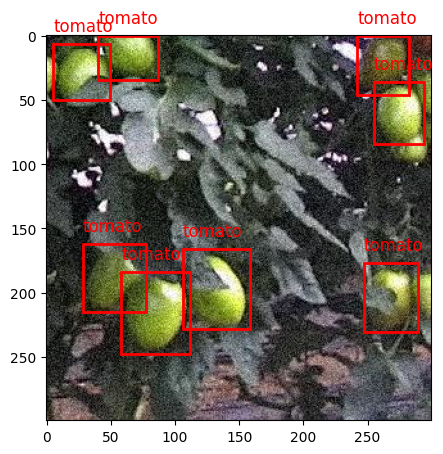

In [72]:
#Visualización de la etiqueta
from matplotlib.patches import Rectangle
import cv2 # Import cv2 for image resizing

i = np.random.randint(len(filtered_boxes))
plt.figure(figsize=(5,5));
ax = plt.subplot(111)

# Check the dimensions of the image and resize if necessary
print("Image shape before resizing:", img.shape)
max_size = 2**16 - 1  # Maximum allowed size for Agg renderer
if img.shape[0] > max_size or img.shape[1] > max_size:
    resize_factor = max_size / max(img.shape[0], img.shape[1])
    new_shape = (int(img.shape[1] * resize_factor), int(img.shape[0] * resize_factor))
    img = cv2.resize(img, new_shape) # Assuming you have cv2 installed for resizing
    print("Image resized to:", img.shape)

plt.imshow(img)
h,w = img.shape[:2]
print(h,w)
for i in range(len(filtered_boxes)):
    k = filtered_boxes.iloc[i]
    label = k['class']
    ax.add_patch(Rectangle((k.xmin,k.ymin),(k.xmax-k.xmin),(k.ymax-k.ymin), linewidth=2,edgecolor='r',facecolor='none'))
    plt.text(k.xmin, k.ymin-10, label, fontsize=12, color="red")

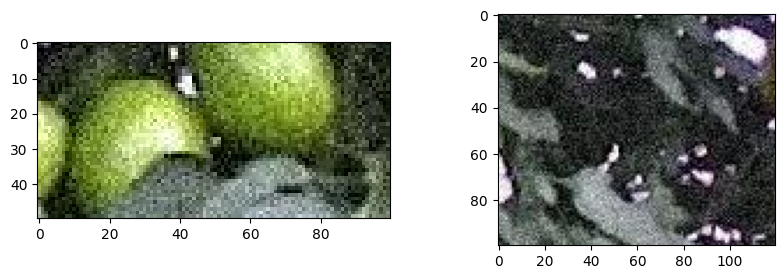

In [74]:
patches = [img[0:50, 0:100],
           img[0:100, 130:250]]

plt.figure(figsize=(10,3))
for i,pimg in enumerate(patches):
    plt.subplot(1,len(patches),i+1); plt.imshow(pimg)

In [75]:
from tensorflow.keras.applications import inception_v3
if not "model" in locals():
    model = inception_v3.InceptionV3(weights='imagenet', include_top=True)

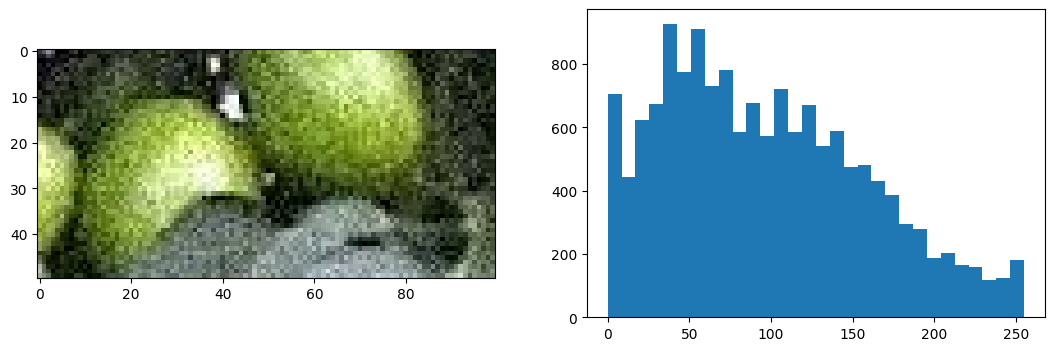

In [76]:
def plot_img_with_histogram(img):
    plt.figure(figsize=(13,4))
    plt.subplot(121)
    plt.imshow(img, vmin=np.min(img), vmax=np.max(img))
    plt.subplot(122)
    plt.hist(img.flatten(), bins=30);

pimg = patches[0]

plot_img_with_histogram(pimg)

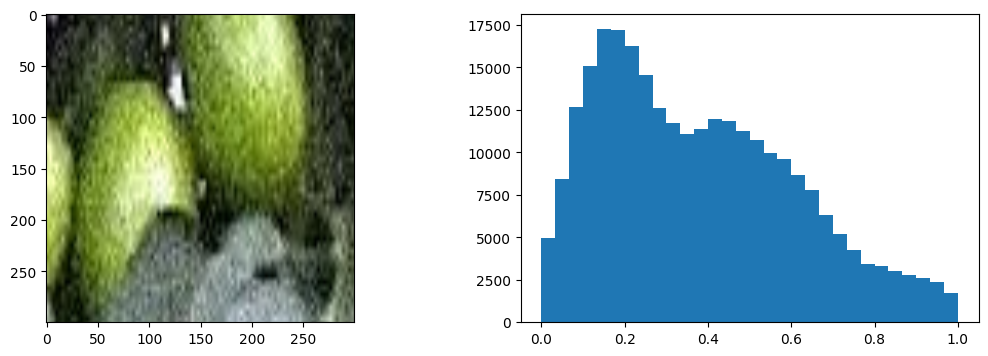

In [78]:
from skimage.transform import resize
rimg = resize(pimg, output_shape=(300,300,3))
plot_img_with_histogram(rimg)

In [79]:
pred = model.predict(rimg.reshape(-1,*rimg.shape))
pred.shape

1/1 [==============================] - 1s 1s/step


(1, 1000)

In [80]:
k = pd.DataFrame(inception_v3.decode_predictions(pred, top=100)[0], columns=["code", "label", "preds"])
k = k.sort_values(by="preds", ascending=False)
k

,code,label,preds
0,n02666196,abacus,0.590641
1,n02356798,fox_squirrel,0.033492
2,n02484975,guenon,0.032273
3,n12267677,acorn,0.028485
4,n07742313,Granny_Smith,0.016195
...,...,...,...
95,n02112137,chow,0.000583
96,n03884397,panpipe,0.000580
97,n02480495,orangutan,0.000571
98,n02895154,breastplate,0.000536


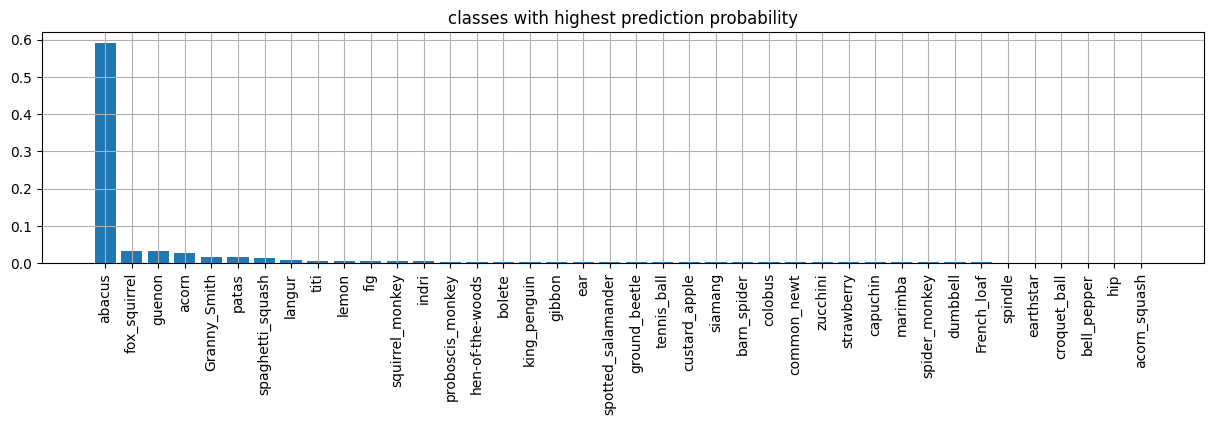

In [81]:
plt.figure(figsize=(15,3))
n = 40
plt.bar(range(n), k[:n].preds.values)
plt.xticks(range(n), k[:n].label.values, rotation="vertical");
plt.title("classes with highest prediction probability")
plt.grid();

In [82]:
print ('Predicted:')
k = inception_v3.decode_predictions(pred, top=10)[0]
for i in k:
    print("%10s %20s %.6f"%i)

Predicted:
 n02666196               abacus 0.590641
 n02356798         fox_squirrel 0.033492
 n02484975               guenon 0.032273
 n12267677                acorn 0.028485
 n07742313         Granny_Smith 0.016195
 n02486261                patas 0.015749
 n07716906     spaghetti_squash 0.014423
 n02488291               langur 0.008809
 n02493509                 titi 0.006990
 n07749582                lemon 0.006494


In [83]:
import tensorflow_hub as hub

In [84]:
classnames = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt', names=["label"])
if not 'm' in locals():
    m = tf.keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4")
    ])
    m.build([None, 299, 299, 3])

In [85]:
preds = m(rimg.reshape(-1,*rimg.shape).astype(np.float32)).numpy()[0]
preds = np.exp(preds)/np.sum(np.exp(preds))
np.sum(preds)

1.0

In [86]:
names = classnames.copy()
names["preds"] = preds
names = names.sort_values(by="preds", ascending=False)
names.head()

,label,preds
336,fox squirrel,0.464782
381,titi,0.075904
371,guenon,0.066575
372,patas,0.060638
378,marmoset,0.038420


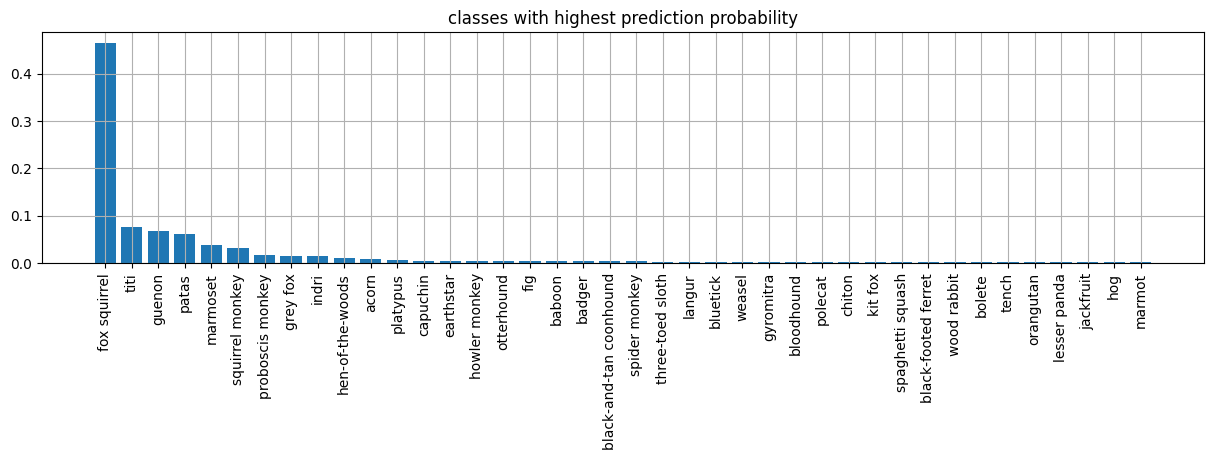

In [87]:
plt.figure(figsize=(15,3))
n = 40
plt.bar(range(n), names[:n].preds.values)
plt.xticks(range(n), names[:n].label.values, rotation="vertical");
plt.title("classes with highest prediction probability")
plt.grid();

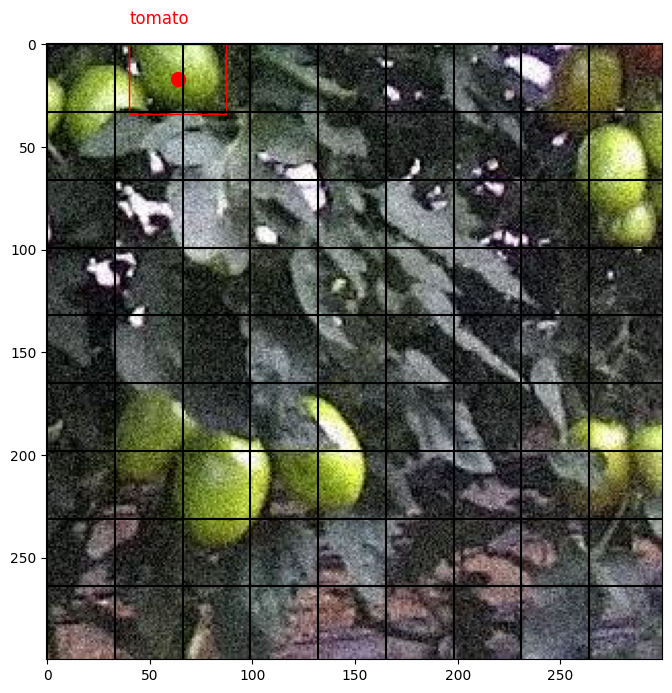

In [88]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.imshow(img)

n = 9
for i in range(n):
    plt.axvline(img.shape[1] // n * i, color="black")
    plt.axhline(img.shape[0] // n * i, color="black")

k = filtered_boxes.iloc[0]
label = k['class']
ax.add_patch(Rectangle((k['xmin'], k['ymin']), (k['xmax'] - k['xmin']), (k['ymax'] - k['ymin']),
                       fill=False, edgecolor='r'))
plt.text(k['xmin'], k['ymin'] - 10, label, fontsize=12, color="red")
plt.scatter(k['xmin'] + (k['xmax'] - k['xmin']) / 2, k['ymin'] + (k['ymax'] - k['ymin']) / 2, color="red", s=100)

plt.show()